In [2]:
#importing packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc

from sklearn.tree import plot_tree

import pickle

In [3]:
# loading the dataset in a dataframe
df0 = pd.read_csv('HR_capstone_dataset.csv')

In [4]:
#checking the first 10 rows of the dada
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# > Initial EDA and data cleaning

In [5]:
#we have 10 columns, 1 of this columns is the labeled data ('left'), that's our target.
# from the other variables of the dataset we need to know if we have a model to predict if an employee will leave the 
# company or not

df0.describe(include=  'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# we have 5 numerical variables and 4 categorical variables
# the categorical variables are: 
# Department with 10 unique values 
# Salary with 3 unique values
# work_accident: 0 or 1
# promotio_last_5years: 0 or 1



In [8]:
df0.shape

(14999, 10)

There are 10 columns and 14999 rows

In [9]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There is no missing values in the dataset

In [10]:
# standardzation of columns names

df0 = df0.rename(columns = {'Work_accident' :'work_accident',
                            'Department' : 'department',
                            'time_spend_company' : 'tenure',
                           'average_montly_hours' : 'average_monthly_hours'})

In [11]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
#check for duplicates

In [13]:
df0.duplicated().sum()

3008

In [14]:
df0[df0.duplicated() == True]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
# it's almost impossible 2 employees have the same numbers to 10 variables, when 2 variablçes are float and 1 integer with a lot of possibvle nuymbers
# it's possible to just drop the duplicates

In [16]:
df1 = df0.drop_duplicates(keep='first')


In [17]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [18]:
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


In [19]:
df1.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [20]:
# ok, now we know trhat we doin't have any missing value and any duplicated value

In [21]:
# checking for relationships between variables

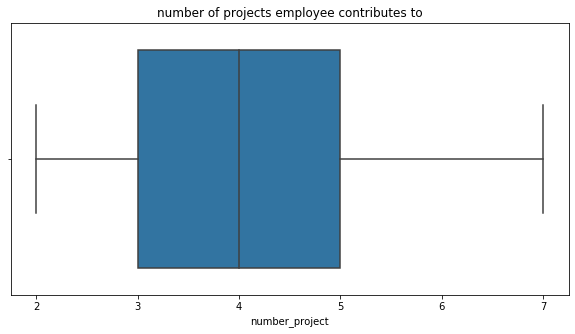

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df1, x='number_project')
plt.title('number of projects employee contributes to')
plt.show()

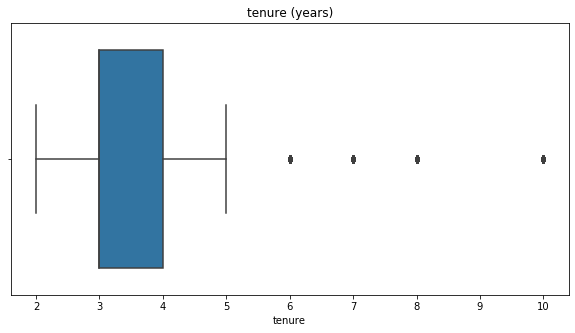

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, x='tenure')
plt.title('tenure (years)')
plt.show()

to time spend in company 6 years or mores are considered outliers

In [24]:
# checking the number of otliers

percentile25 = df1['tenure'].quantile(0.25) 
percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25 #inter quartile range

lower_limit = percentile25 - (1.5 * iqr)
upper_limit = percentile75 + (1.5 * iqr)

print('lower limit:', lower_limit)
print('upper limit:', upper_limit)

outliers_tenure = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print(f'number of outliers:', len(outliers_tenure))

lower limit: 1.5
upper limit: 5.5
number of outliers: 824


In [25]:
# There are 824 rows with outliers, almost 8%, it's a considerable number. 
# Considering the some models are more sensitive to outliers, can be necessary to handle with these outliers during modeling implementation

it's necerssary to check correlation between variables

# >>EDA (Analyzing relationship between variables)

In [26]:
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Text(0.5, 1.0, 'histogram of number of projects')

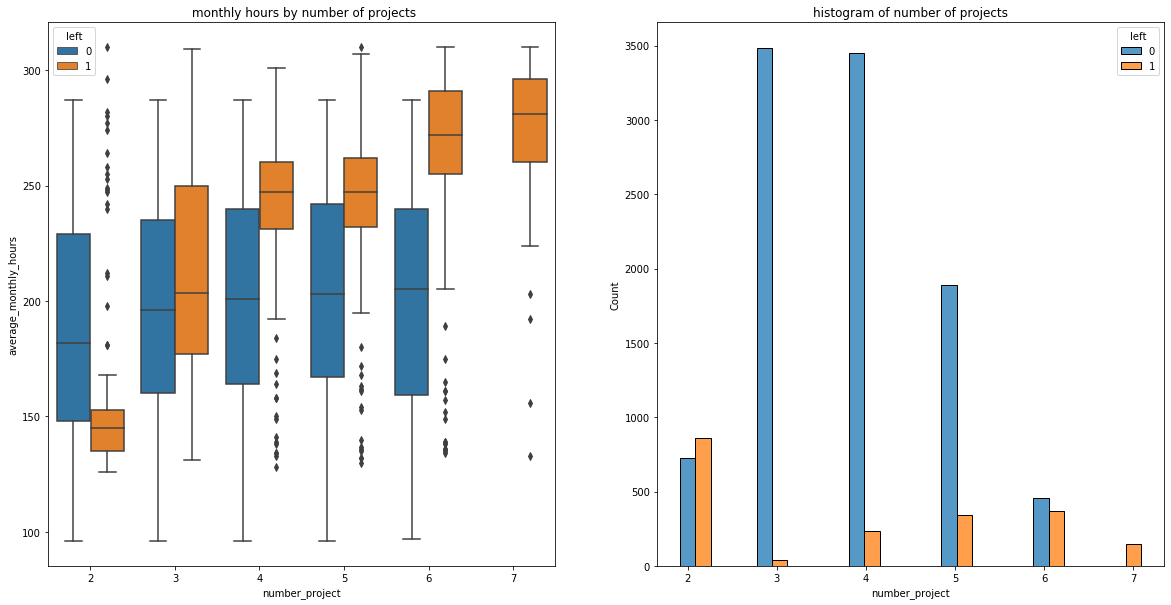

In [27]:
# we can check the satisfaction level and average monthly hours
fig, ax = plt.subplots(1, 2, figsize=(20,10))


sns.boxplot(data=df1, y='average_monthly_hours', x='number_project', hue='left', orient='v', ax=ax[0])
ax[0].set_title(' monthly hours by number of projects')

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('histogram of number of projects')




 We get some good insights here.
 The data shows a relationship between the number of projects and the percentage of people who left the company.
 3 and 4 projects we have the smaller percentage of people who left the company
 One presumption is that people with less projects like 1 is already leaving the company because their boses want to.

 All employees with 7 projects leave the company, probably over worked

 We can chech the relation between nuymber of projects and waverage monthly hours where we can infer that people who leaves 
 the company haver been wroking in 4 or more projects more hours by month

In [28]:
df1['left'][df1['number_project'] == 7].value_counts()

1    145
Name: left, dtype: int64

Confirming that all employees with 7 projects leave the company

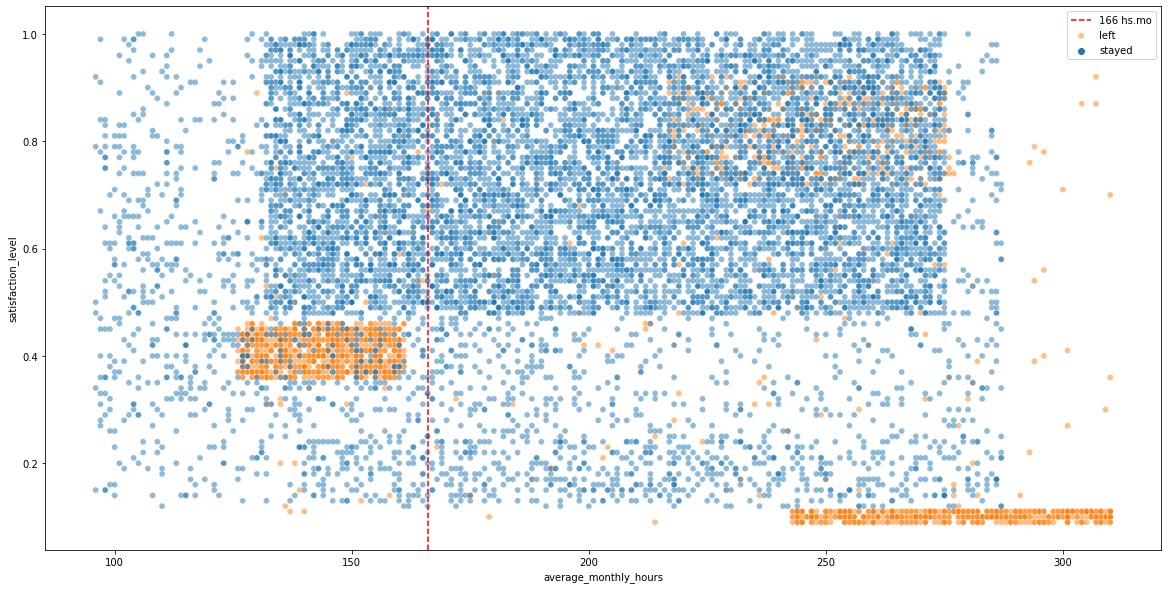

In [29]:
#checking the relation between satisfaction level and average monthly hours

plt.figure(figsize=(20,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(x=166, color='red', linestyle='--', label = '166 hs.mo')
plt.legend(labels=['166 hs.mo', 'left', 'stayed'])
plt.show()


Here the dataa shows that a big part of the team is overworking

The graph shows a pattern around 0.4 satisfactrion level and 150 hour/month that is a little strange.


There is a strange shape of the distribuition. Ths is indicative of data manipulation or synthetic data.


In [30]:
#we can create satisfaction levels from float numbers to check relationships
df2 = df1.copy()
df2['satisfaction_level_cat'] = pd.qcut(df2['satisfaction_level'], q=9, labels=range(1, 10)).astype(int)
df2.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,satisfaction_level_cat
0,0.38,0.53,2,157,3,0,1,0,sales,low,2
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,6
4,0.37,0.52,2,159,3,0,1,0,sales,low,2
5,0.41,0.50,2,153,3,0,1,0,sales,low,2
6,0.10,0.77,6,247,4,0,1,0,sales,low,1
7,0.92,0.85,5,259,5,0,1,0,sales,low,8
8,0.89,1.00,5,224,5,0,1,0,sales,low,8
9,0.42,0.53,2,142,3,0,1,0,sales,low,2


Text(0.5, 1.0, 'histogram of number of projects')

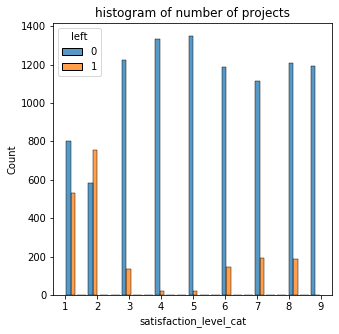

In [31]:
plt.figure(figsize=(5,5))

sns.histplot(data=df2, x='satisfaction_level_cat', hue='left', multiple='dodge', shrink=0.8)
plt.title('histogram of number of projects')

Text(0.5, 1.0, 'histogram of number of projects')

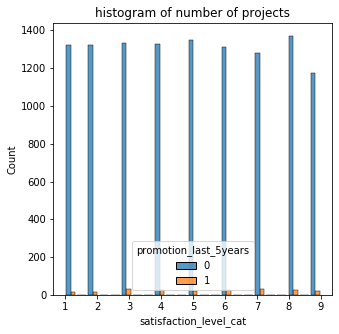

In [32]:
plt.figure(figsize=(5,5))

sns.histplot(data=df2, x='satisfaction_level_cat', hue='promotion_last_5years', multiple='dodge', shrink=0.8)
plt.title('histogram of number of projects')

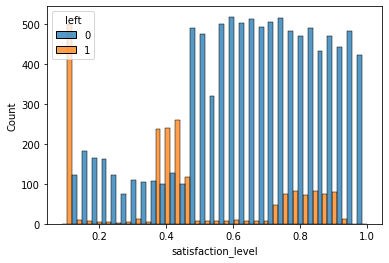

In [33]:
sns.histplot(data=df2, x='satisfaction_level', hue='left', multiple='dodge')

### Satisfactrion level by tenure

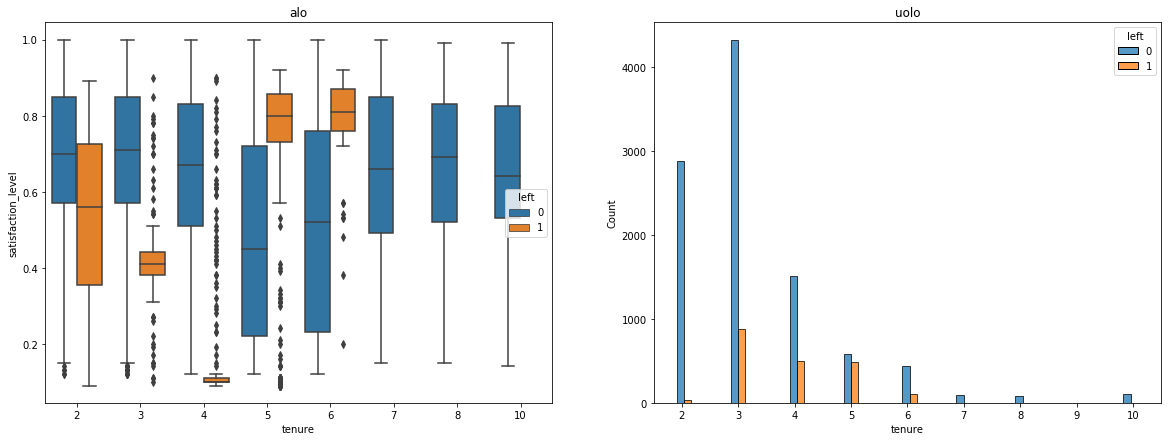

In [34]:
fig, ax = plt.subplots(1,2, figsize = (20, 7))

sns.boxplot(data=df2, x='tenure', y='satisfaction_level', hue='left', ax=ax[0])
ax[0].set_title('alo')

sns.histplot(data=df2, x='tenure', hue='left', multiple='dodge', shrink=3)
ax[1].set_title('uolo')

plt.show()



3 and 4 years tenure there are a lot of outliers.
in 3 years tenure the boxplot shows that a lot of employees who left the company, the satisfaction level is surroundin 0.4. 
It's similar with the scatterplot of nº of projects and 

In [35]:
df2.groupby('left')['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [36]:
#examining salary levels and tenure


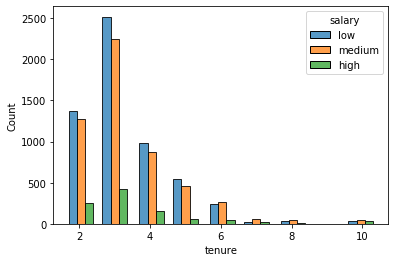

In [37]:
sns.histplot(data=df2, x='tenure', hue='salary', multiple='dodge', shrink=8)

In [38]:
tenure_short = df2[df2['tenure'] <= 6] 

tenure_long = df2[df2['tenure'] > 6] 

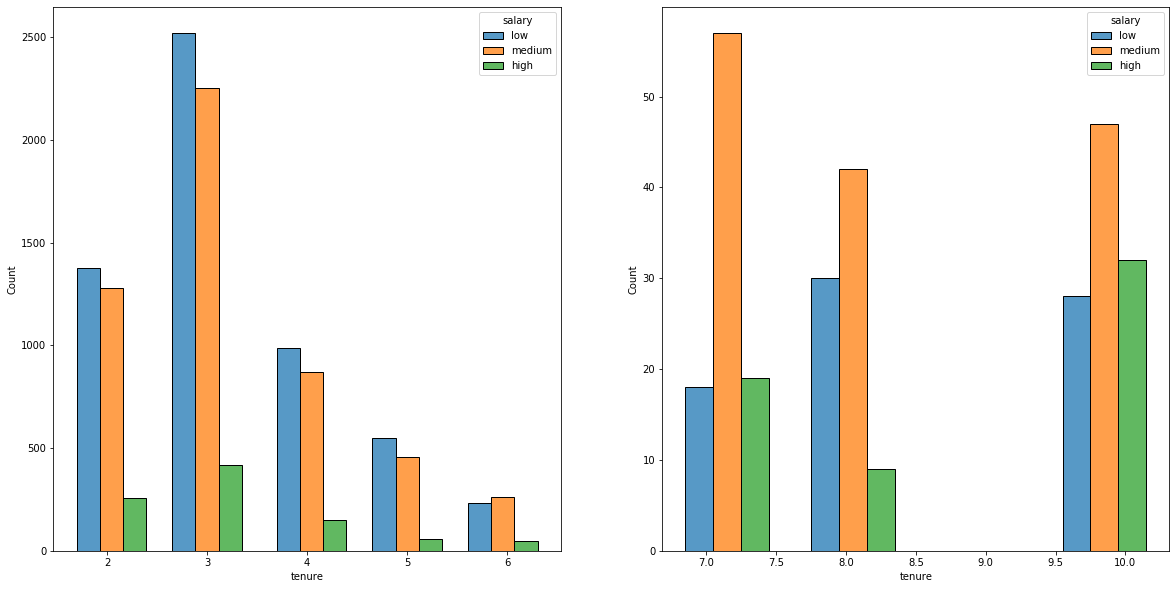

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

sns.histplot(data=tenure_short, x='tenure', ax=ax[0], hue='salary', multiple='dodge', shrink=8,
            hue_order=['low','medium', 'high'])

sns.histplot(data=tenure_long, x='tenure', ax=ax[1], hue='salary', multiple='dodge', shrink=2,
             hue_order=['low','medium', 'high'])

<function matplotlib.pyplot.show(*args, **kw)>

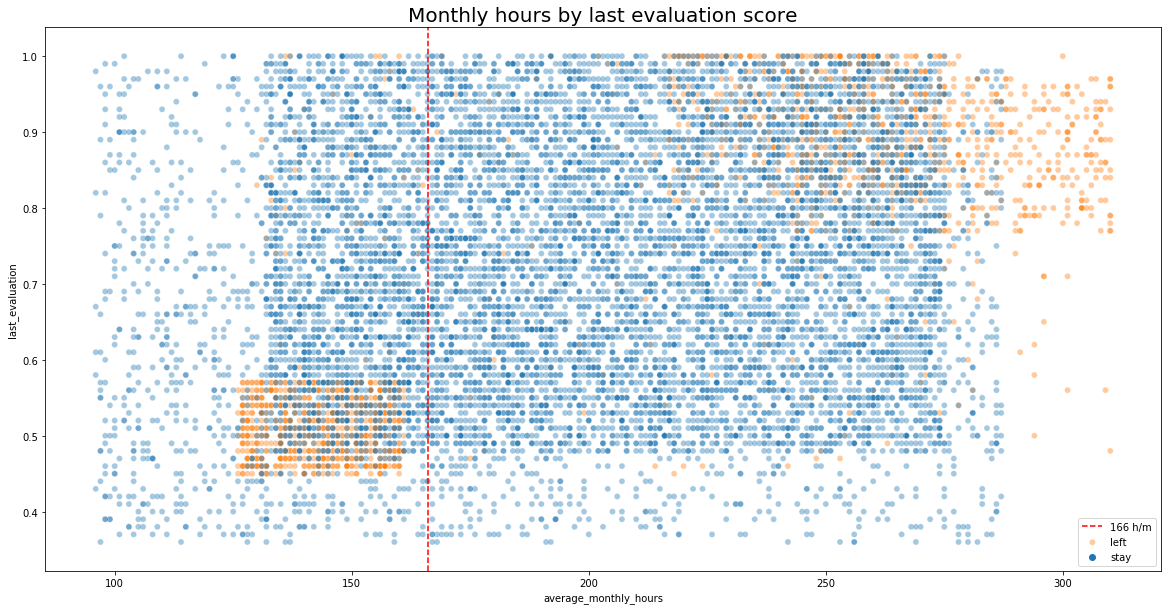

In [40]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left',
               alpha=0.4)
plt.title('Monthly hours by last evaluation score', fontsize='20')
plt.axvline(x=166, color='red', ls='--', label='166 h/m')
plt.legend(labels = ['166 h/m', 'left', 'stay'])
plt.show

### Checking the relationship between promotion and how left

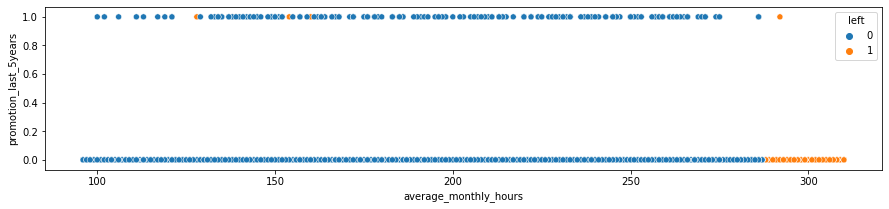

In [41]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=df2, x='average_monthly_hours', y='promotion_last_5years', hue='left' )
plt.show()

In [42]:
df1.groupby(['promotion_last_5years'])['left'].value_counts(normalize=True)

promotion_last_5years  left
0                      0       0.831778
                       1       0.168222
1                      0       0.960591
                       1       0.039409
Name: left, dtype: float64

Considering the percentage of people who left the company is much smaller between who was promoted in the last 5 years.
It's a big point to check the insatisfaction

## checking if there is a relationship between departments and employees who left the company


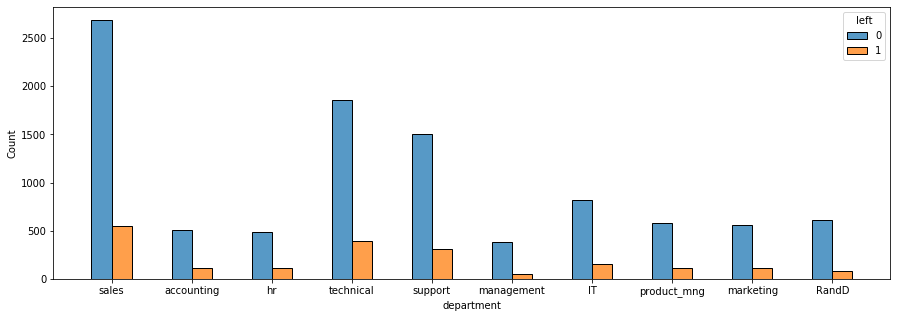

In [43]:
plt.figure(figsize=(15,5))
sns.histplot(data=df2, x='department', hue='left', shrink=0.5, multiple='dodge')



In [44]:
# Group by 'department' and calculate proportions for 'left'
grouped = df2.groupby(['department'])['left'].value_counts(normalize=True).unstack()

total_employees = df2.groupby('department')['left'].count()


grouped.columns = ['Not Left (0)', 'Left (1)']

grouped2 = grouped.copy()
grouped2['Total Employees'] = total_employees
grouped2['Difference from Mean'] = grouped2['Not Left (0)'] - grouped2['Not Left (0)'].mean()

# Display the styled table
grouped2.style.format("{:.1%}").set_caption("Proportion of Employees Who Left by Department (with Differences)")
grouped2

,Not Left (0),Left (1),Total Employees,Difference from Mean
department,,,,
IT,0.838115,0.161885,976,-0.000997
RandD,0.877522,0.122478,694,0.038409
accounting,0.824477,0.175523,621,-0.014635
hr,0.811980,0.188020,601,-0.027132
management,0.880734,0.119266,436,0.041622
marketing,0.833581,0.166419,673,-0.005531
product_mng,0.839650,0.160350,686,0.000538
sales,0.830195,0.169805,3239,-0.008918
support,0.828666,0.171334,1821,-0.010447


### *null hypothesis:*
#### there is no difference in the mean left employees rate between departments
### *alternative hypoithesis:* 
#### there is difference in the mean employees left rates departments



We don't have any big difference between departments of employees who left the company

## Checking correlations

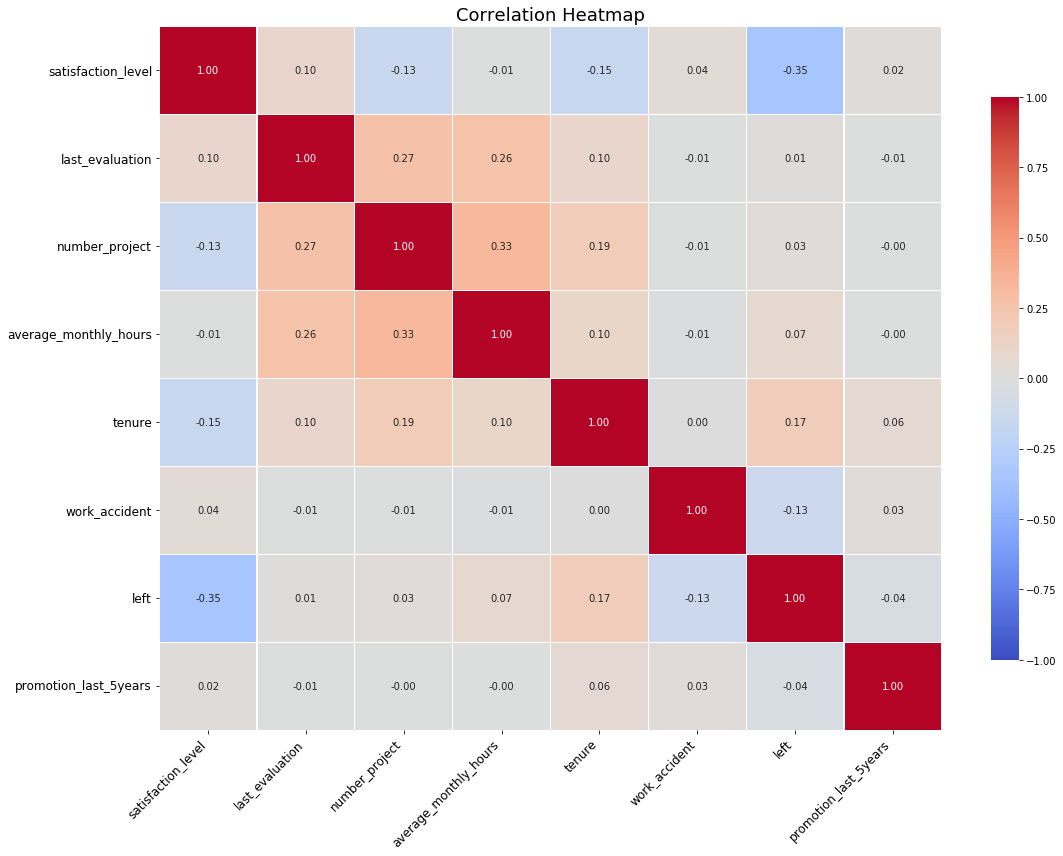

In [45]:
plt.figure(figsize = (16,12))

heatmap = sns.heatmap(
    df1.corr(),            
    vmin=-1, vmax=1,       
    annot=True,            
    fmt=".2f",             
    cmap="coolwarm",       
    linewidths=0.2,        
    cbar_kws={"shrink": 0.8, "aspect": 20}  # Customize the colorbar
)

# Add a title and adjust its font size
plt.title("Correlation Heatmap", fontsize=18)

# Adjust the labels for better readability
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()

# Logistic regression

Recall model assumptions
Logistic Regression model assumptions

Outcome variable is categorical - OK
Observations are independent of each other - OK
No severe multicollinearity among X variables - OK
No extreme outliers - check
Linear relationship between each X variable and the logit of the outcome variable - 
Sufficiently large sample size - OK

Reflect on these questions as you complete the constructing stage.
Do you notice anything odd? 
Which independent variables did you choose for the model and why?
Are each of the assumptions met?
How well does your model fit the data?
Can you improve it? Is there anything you would change about the model?
What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Do you have any ethical considerations in this stage?

In [46]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [48]:
#making a copy from data set and make the data treatment (making salary categorical and number)
df_enc = df1.copy()

salary_categories= ['low', 'medium', 'high']

df_enc['salary'] = (df_enc['salary']
                        .astype('category')
                        .cat.set_categories(salary_categories)
                        .cat.codes)

In [49]:
df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int8   
 9   department_IT           11991 non-null  uint8  
 10  department_RandD        11991 non-null  uint8  
 11  department_accounting   11991 non-null  uint8  
 12  department_hr           11991 non-null  uint8  
 13  department_management   11991 non-null  uint8  
 14  department_marketing    11991 non-null

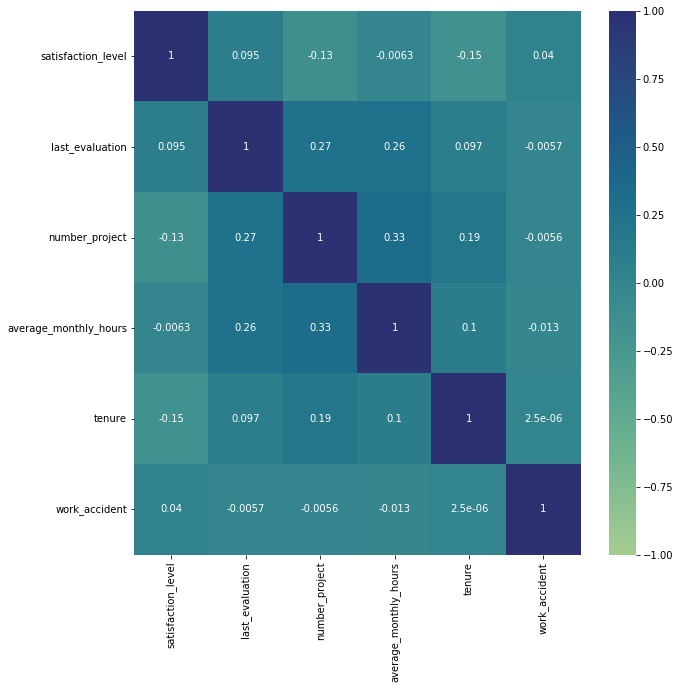

In [51]:
# "checking correlation between variables
plt.figure(figsize = (10, 10))
sns.heatmap(data = df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident']]
            .corr()
           , annot=True
           ,cmap='crest'
           , vmax=1
           , vmin=-1)

Logistic Regression is sensitive to outliers.
Tenure has outliers, we need to treat this

## Outliers been reescaled

In [52]:
scaler = MinMaxScaler()
df_lr = df_enc.copy()
df_lr['tenure_scaled'] = scaler.fit_transform(df_lr[['tenure']])

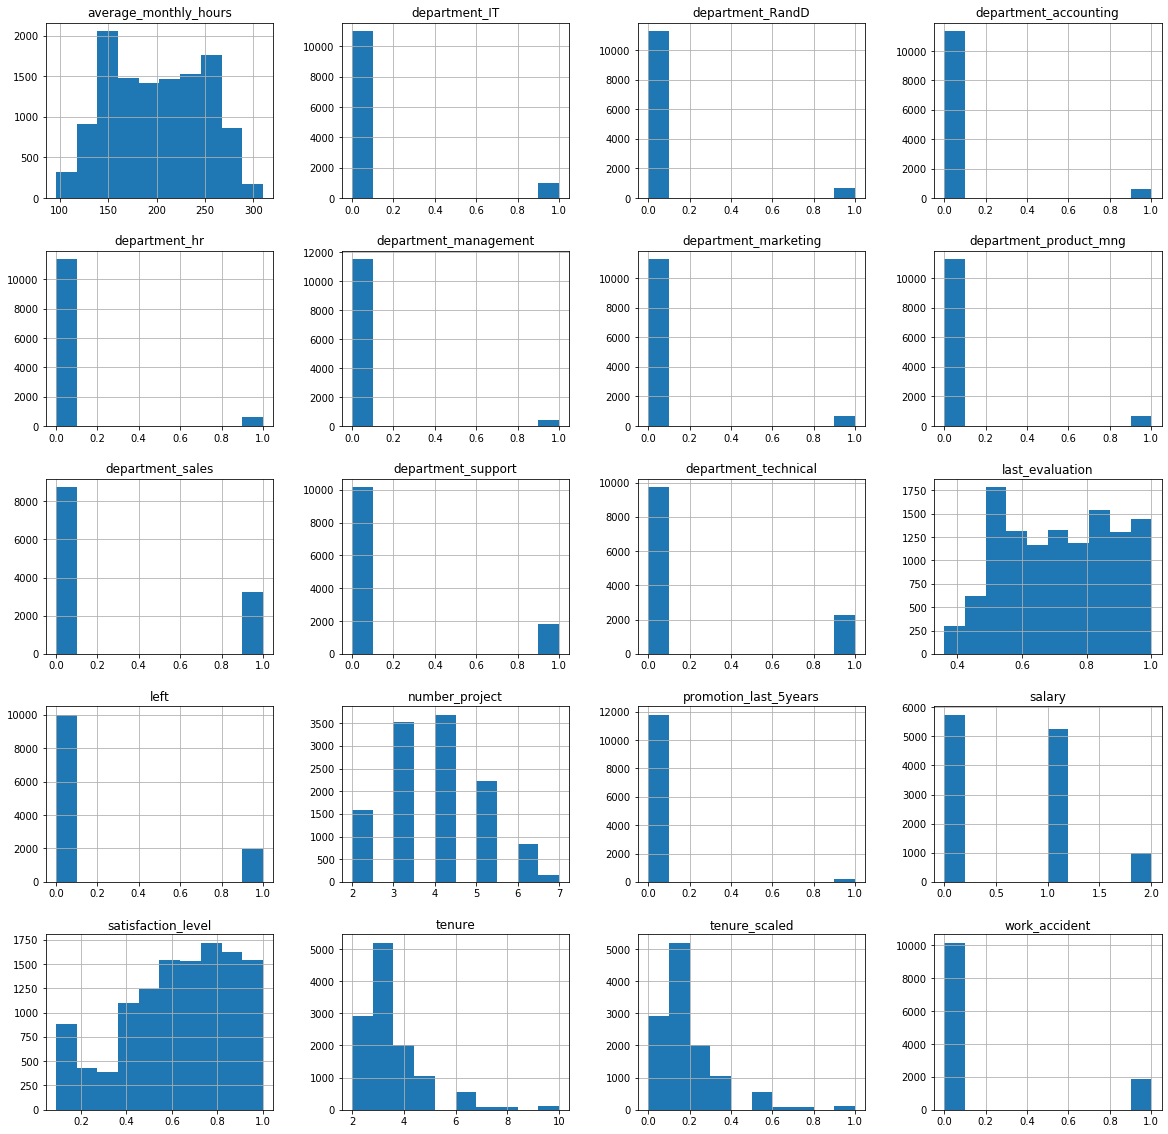

In [53]:
# checking the data through histograms
df_lr.hist()
plt.gcf().set_size_inches(20, 20)


In [54]:
df_lr[['average_monthly_hours', 'left']]

,average_monthly_hours,left
0,157,1
1,262,1
2,272,1
3,223,1
4,159,1
...,...,...
11995,259,0
11996,266,0
11997,185,0
11998,172,0


In [55]:
# adding a categorical variable to treat average_monthly hours
avg_mont_hrs_int = list(range(df_lr['average_monthly_hours'].min()-50
                             ,df_lr['average_monthly_hours'].max()+50
                             , 50))
name_int = [f'mont_{i}' for i in range(len(avg_mont_hrs_int)-1)]
df_lr['avg_mont_int'] = pd.cut(df_lr['average_monthly_hours'], avg_mont_hrs_int, labels= name_int, include_lowest=True )
df_lr['avg_mont_int'].unique()

[mont_2, mont_4, mont_3, mont_1, mont_5, mont_0]
Categories (6, object): [mont_0 < mont_1 < mont_2 < mont_3 < mont_4 < mont_5]

In [56]:
cross_df = pd.crosstab(index = df_enc['left'], columns = df_lr['avg_mont_int'])
cross_df.index = ['stay', 'left']
cross_df

avg_mont_int,mont_0,mont_1,mont_2,mont_3,mont_4,mont_5
stay,6,1444,3430,3172,1948,0
left,0,504,403,311,660,113


In [57]:
categories_hours = ['mont_0', 'mont_1', 'mont_2', 'mont_3', 'mont_4', 'mont_5']

df_lr['avg_mont_int'] = (df_lr['avg_mont_int']
                          .cat.set_categories(categories_hours)
                          .cat.codes
                         )

In [58]:
df_lr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'tenure_scaled',
       'avg_mont_int'],
      dtype='object')

in some groups (mont_1 and mont_4 and mont_5) the relation between who left the company is greater than other groups

In [59]:
df_lr['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [60]:
# Test 01

X_scaled = df_lr.drop(['tenure', 'avg_mont_int', 'left'], axis=1)
y = df_lr['left']

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, stratify =y, test_size = 0.25, random_state = 42)

In [60]:
X_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,tenure_scaled
0,0.38,0.53,2,157,0,0,0,0,0,0,0,0,0,0,1,0,0,0.125
1,0.80,0.86,5,262,0,0,1,0,0,0,0,0,0,0,1,0,0,0.500
2,0.11,0.88,7,272,0,0,1,0,0,0,0,0,0,0,1,0,0,0.250
3,0.72,0.87,5,223,0,0,0,0,0,0,0,0,0,0,1,0,0,0.375
4,0.37,0.52,2,159,0,0,0,0,0,0,0,0,0,0,1,0,0,0.125


In [61]:
lr = LogisticRegression(random_state=42, max_iter=800)
lr = lr.fit(X_train_scaled, y_train)

In [62]:
#probabilituy of left
y_probs_train_scaled = lr.predict_proba(X_train_scaled)[:, 1]
y_probs_test_scaled = lr.predict_proba(X_test_scaled)[:, 1]

In [63]:
def threshold_optimal (y_train, y_probs_train):
    
    thresholds = np.arange(0, 1.01, 0.01)
 
    # Performance metrics
    f1_scores = []
    roc_auc_scores = []
    
    for thresh in thresholds:
        y_pred = (y_probs_train >= thresh).astype(int)
        f1_scores.append(f1_score(y_train, y_pred))
        roc_auc_scores.append(roc_auc_score(y_train, y_pred))

    # Optimal threshold (e.g., max F1-score)
    optimal_idx = np.argmax(f1_scores)
    optimal_thresh = thresholds[optimal_idx]
  
    # Plot the results
    plt.plot(thresholds, roc_auc_scores, label='Roc AUC Score')
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.axvline(optimal_thresh, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_thresh:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Precision Score')
    plt.legend()
    plt.title('Threshold Tuning')
    plt.show()
    print(f"Optimal Threshold: {optimal_thresh:.2f}")
    return optimal_thresh
   

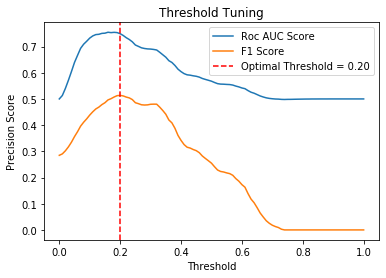

Optimal Threshold: 0.20


In [64]:
optimal_thresh = threshold_optimal(y_train, y_probs_train_scaled)

In [65]:
y_train_optimal_scaled =  (y_probs_train_scaled >= optimal_thresh).astype(int)
y_pred_optimal_scaled =  (y_probs_test_scaled >=  optimal_thresh).astype(int)

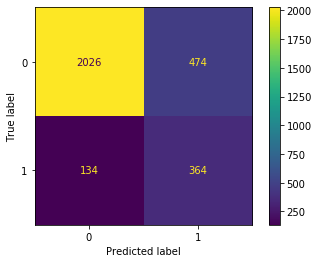

In [66]:
#making the confusion matrix to evaluate the model
log_cm_scaled = confusion_matrix(y_test, y_pred_optimal_scaled)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm_scaled,
                                 display_labels = lr.classes_)
log_disp.plot()
plt.show()

In [67]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_optimal_scaled, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.94      0.81      0.87      2500
    Predicted would leave       0.43      0.73      0.54       498

                 accuracy                           0.80      2998
                macro avg       0.69      0.77      0.71      2998
             weighted avg       0.85      0.80      0.82      2998



In [68]:
# Fazendo a previsao na base de treinamento e na de teste

# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_train_optimal_scaled)
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento : %f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - 
# Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,  y_pred_optimal_scaled)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste : %f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.749047
Gini - Treinamento:  0.5


AUC - Teste : 0.770662
Gini - Teste:  0.54


## Without outliers

In [69]:
tenure_outliers_mask = (df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)


In [70]:
df_enc_wo = df_enc

In [71]:
df_enc_wo.shape

(11991, 19)

In [72]:
X_wo = df_enc_wo.drop(['left'], axis=1)
y_wo = df_enc_wo['left']

X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_wo, y_wo, stratify=y_wo, test_size = 0.25, random_state = 42)
# removing outliers just from Training dataset
# mask = (X_train['tenure'] >= lower_limit) & (X_train['tenure'] <= upper_limit)
# X_train = X_train[mask]
# y_train = y_train[mask]


In [73]:
X_train_wo.shape


(8993, 18)

In [74]:
#applying the mask just in the training dataset
tenure_outliers_mask = (X_train_wo['tenure'] >= lower_limit) & (X_train_wo['tenure'] <= upper_limit)

X_train_wo = X_train_wo[tenure_outliers_mask]
y_train_wo = y_train_wo[tenure_outliers_mask]

In [75]:
lr_wo = LogisticRegression(random_state=42,max_iter=800)
lr_wo = lr_wo.fit(X_train_wo, y_train_wo)

In [76]:
y_pred_wo_train = lr_wo.predict_proba(X_train_wo)[:, 1]
y_probs_wo_test = lr_wo.predict_proba(X_test_wo)[:, 1]

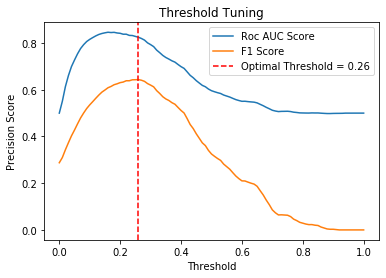

Optimal Threshold: 0.26


In [77]:
optimal_thresh = threshold_optimal(y_train_wo, y_pred_wo_train)


In [78]:
y_train_wo_optimal =  (y_pred_wo_train >= optimal_thresh).astype(int)
y_pred_wo_optimal =  (y_probs_wo_test >=  optimal_thresh).astype(int)

In [79]:
y_test_wo.shape

(2998,)

In [80]:
y_pred_wo_optimal.shape

(2998,)

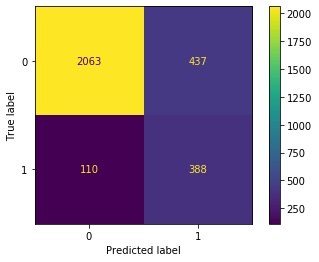

In [81]:
cm_wo = confusion_matrix(y_test_wo, y_pred_wo_optimal)
log_disp = ConfusionMatrixDisplay(confusion_matrix = cm_wo,
                                 display_labels = lr_wo.classes_)
log_disp.plot()
plt.show()

In [82]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test_wo, y_pred_wo_optimal, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.83      0.88      2500
    Predicted would leave       0.47      0.78      0.59       498

                 accuracy                           0.82      2998
                macro avg       0.71      0.80      0.73      2998
             weighted avg       0.87      0.82      0.83      2998



In [83]:
# Fazendo a previsao na base de treinamento e na de teste

# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_wo, y_train_wo_optimal)
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento : %f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_wo,  y_pred_wo_optimal)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste : %f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.824721
Gini - Treinamento:  0.65


AUC - Teste : 0.802158
Gini - Teste:  0.6


This model show stability

# Decision Tree

In [84]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
X = df_enc.drop(['left'], axis=1)
y = df_enc['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [86]:
X.shape

(11991, 18)

In [87]:
X.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.016929,0.60387,0.081394,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.129012,0.63590,0.273451,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [90]:
tree = DecisionTreeClassifier(random_state = 42)


cv_params = {'max_depth' : [3, 4, 5, 6],
            'min_samples_leaf' : [4, 5, 6],
            'min_samples_split' : [2, 3]
            }


scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')



In [91]:
%%time
tree1.fit(X_train, y_train)

Wall time: 2.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'roc_auc', 'accuracy', 'f1'})

In [92]:
tree1.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [93]:
tree1


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'roc_auc', 'accuracy', 'f1'})

In [94]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name(string): model name, how it will be called in the output
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy or auc
    '''
    
    metric_dict = {'accuracy' : 'mean_test_accuracy',
                   'roc_auc' : 'mean_test_roc_auc',
                   'f1' : 'mean_test_f1',
                   'precision' : 'mean_test_precision',
                   'recall' : 'mean_test_recall',
                   
                  }
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    
    table= pd.DataFrame()
    table = pd.DataFrame({'model' : [model_name],
                         'accuracy' : [accuracy],
                         'precision' : [precision],
                         'recall' : [recall],
                         'f1' : [f1],
                         'roc_auc' : [roc_auc]
                        })

    return table

In [95]:
tree1_cv_results = make_results('decision_tree_cv', tree1, 'roc_auc')
tree1_cv_results

,model,accuracy,precision,recall,f1,roc_auc
0,decision_tree_cv,0.976426,0.948989,0.906897,0.92738,0.973927


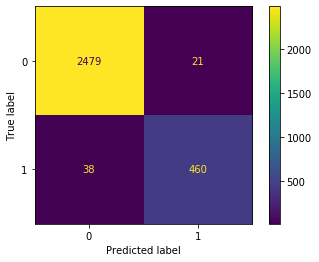

In [96]:
y_pred_train = tree1.best_estimator_.predict(X_train)
y_pred = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, 
                     labels=tree1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels=tree1.classes_)
disp.plot(values_format = '')

In [97]:

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.96      0.92      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998

0.9397344228804904


In [98]:
# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print(f'AUC - Treinamento : {roc_auc_train:.3f}')
print(f'Gini - Treinamento: {(2*roc_auc_train-1):.3f}')
print("\n")

# Calculando a ROC e o Gini - 
# Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,  y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'AUC - Teste : {(roc_auc_test):.3f}')
print(f'Gini - Teste: {(2*roc_auc_test-1):.3f}')

AUC - Treinamento : 0.955
Gini - Treinamento: 0.909


AUC - Teste : 0.958
Gini - Teste: 0.915


### For this initial tree model, the Gini index is consistent across the training and test datasets. This indicates that the model is robust.

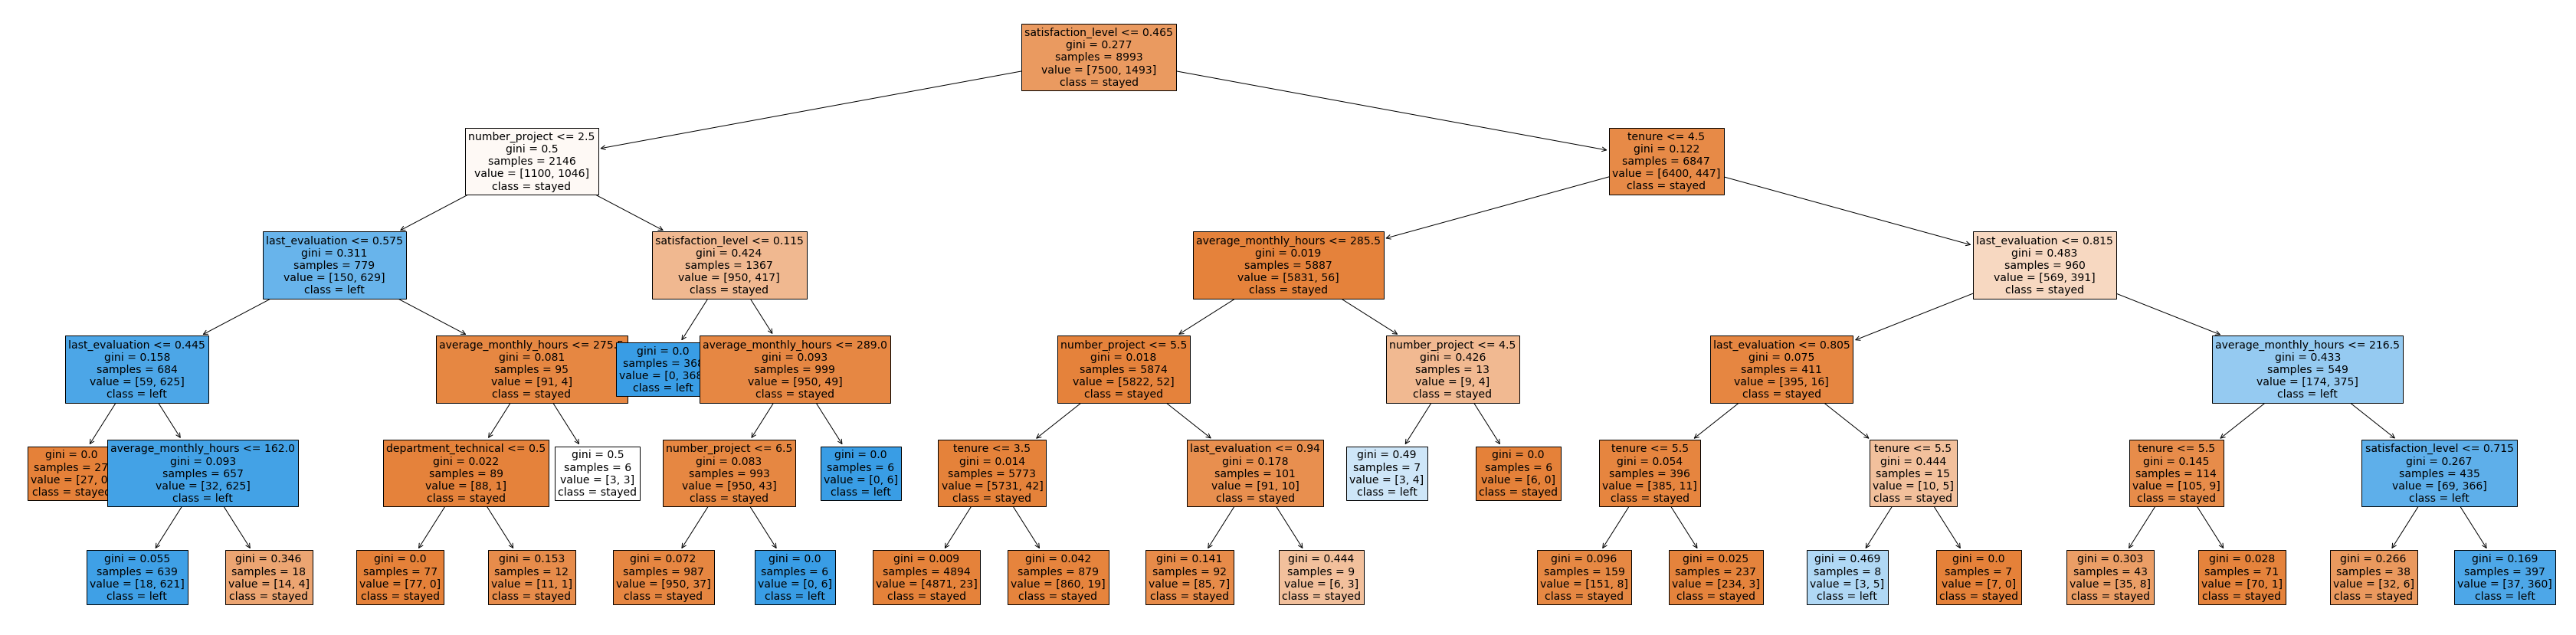

In [99]:
plt.figure(figsize=(60,15))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [100]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                           )


tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# extracting features witn importance>0
tree1_importances = tree1_importances[tree1_importances['gini_importance']>0.005]
tree1_importances

,gini_importance
satisfaction_level,0.514545
last_evaluation,0.173051
tenure,0.123757
number_project,0.123259
average_monthly_hours,0.065321


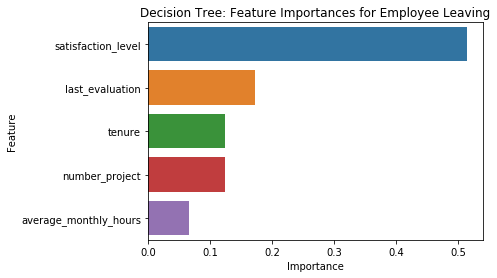

In [101]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

## Random Forest

In [112]:
rf = RandomForestClassifier(class_weight='balanced', random_state=0)

In [117]:
cv_params = {'max_depth' : [5, 6],
            'max_features' : [0.7],
            'max_samples' : [0.7],
            'min_samples_leaf' : [2, 4],
            'min_samples_split' : [2, 4],
            'n_estimators' : [200, 400]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [118]:
%%time
rf_cv.fit(X_train, y_train)

Wall time: 2min


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [5, 6], 'max_features': [0.7],
                         'max_samples': [0.7], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [200, 400]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'roc_auc', 'accuracy', 'f1'})

In [115]:
rf_cv.score(X_train, y_train)

0.9915876311676713

In [116]:
rf_cv.score(X_test, y_test)

0.9815333333333334

In [111]:
print(np.unique(y_pred, return_counts=True))

(array([0, 1], dtype=int64), array([2517,  481], dtype=int64))


In [179]:
rf_cv.best_score_

0.9810540780777337

In [180]:
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 0.7,
 'max_samples': 0.7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [228]:
y_pred_rf = rf_cv.best_estimator_.predict(X_test)


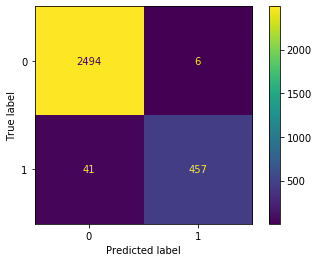

In [229]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_display = ConfusionMatrixDisplay(confusion_matrix = cm_rf, 
                                        display_labels = rf_cv.classes_)
cm_rf_display.plot(values_format='')

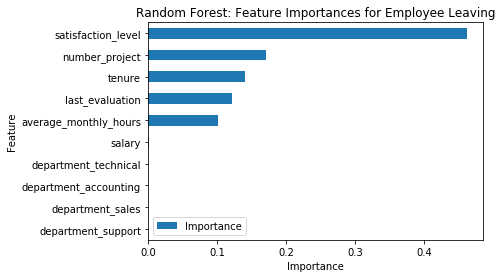

In [230]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [231]:
rf_cv_results = make_results('Random Forest CV', rf_cv, 'roc_auc' )

In [149]:
c = [5, 8, 10]
x2 = map(lambda b: b**2, c)
list(x2)

[25, 64, 100]

In [136]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/vinic/ciencia_de_dados/Google Certificate/'


def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [189]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [190]:
write_pickle(path, rf_cv , 'hr_rf1_cv')

# XGBOOST CLASSIFIER

In [656]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [657]:
cv_params_xgb = {'colsample_bytree': [0.7], 
             'learning_rate': [0.1],
             'max_depth': [4, 5, 6],
             'min_child_weight': [2],
             'n_estimators': [70],
             'subsample': [0.7]
            }



In [658]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [659]:

xgb_cv = GridSearchCV(xgb,
                      cv_params_xgb,
                      scoring = scoring,
                      cv = 4,
                      refit = 'roc_auc'
                     )

In [660]:
%%time 
xgb_cv = xgb_cv.fit(X_train, y_train)


Wall time: 1.87 s


In [661]:
xgb_cv.best_params_
# {'colsample_bytree': 0.7,
#  'learning_rate': 0.1,
#  'max_depth': 5,
#  'min_child_weight': 2,
#  'n_estimators': 70,
#  'subsample': 0.7}

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 70,
 'subsample': 0.7}

In [662]:
y_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

In [663]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###

print(classification_report(y_test,y_pred_xgb ))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.98      0.92      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



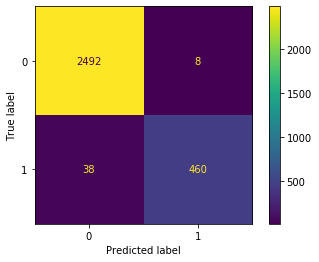

In [664]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb_display = ConfusionMatrixDisplay(confusion_matrix = cm_xgb, 
                                        display_labels = xgb_cv.classes_)
cm_xgb_display.plot(values_format='')

In [441]:
xgb_cv_results = make_results('XGB CV', xgb_cv, 'roc_auc' )

In [450]:
# Generate results for all models
tree1_cv_results = make_results('decision_tree_cv', tree1, 'roc_auc')
rf_cv_results = make_results('Random Forest CV', rf_cv, 'roc_auc')
xgb_cv_results = make_results('XGB CV', xgb_cv, 'roc_auc')

# Combine results into a single DataFrame
all_results = pd.concat([tree1_cv_results, rf_cv_results, xgb_cv_results], ignore_index=True)

# Display the combined table
print(all_results)

              model  accuracy  precision    recall        f1   roc_auc
0  decision_tree_cv  0.976426   0.948989  0.906897  0.927380  0.973927
1  Random Forest CV  0.979873   0.969979  0.906908  0.937331  0.981054
2            XGB CV  0.981875   0.978462  0.910915  0.943449  0.985843


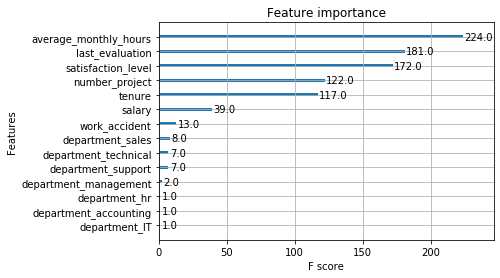

In [366]:
plot_importance(xgb_cv.best_estimator_)

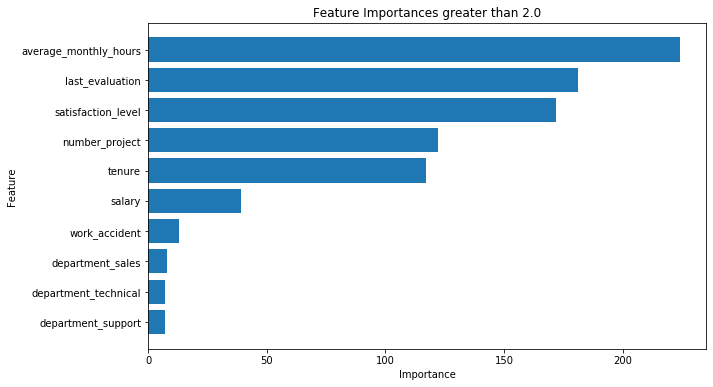

In [367]:
# Get the trained booster from the best estimator
booster = xgb_cv.best_estimator_.get_booster()

# Get feature importances from the booster
importances = booster.get_score(importance_type='weight')

# Filter importances greater than 2.0
filtered_importances = {k: v for k, v in importances.items() if v > 2.0}

# Sort the filtered importances
sorted_features = sorted(filtered_importances.items(), key=lambda item: item[1], reverse=False)

# Prepare data for plotting
features = [item[0] for item in sorted_features]
importance_values = [item[1] for item in sorted_features]

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(features, importance_values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances greater than 2.0')
plt.show()

## Feature Engineering

In [865]:
ds_fe = df_enc.copy()

In [866]:
%%time
ds_fe['n_proj_w_hs'] = (((ds_fe['average_monthly_hours'])**2/ds_fe['number_project']))

Wall time: 3.54 ms


In [867]:
ds_fe['dif_sat_eval'] =  ds_fe['satisfaction_level'] - ds_fe['last_evaluation']

In [868]:
X_opt = ds_fe.drop(['left', 'satisfaction_level'], axis=1)


X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_opt, y, stratify=y, test_size=0.25, random_state=0)

In [869]:
X_opt.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,n_proj_w_hs,dif_sat_eval
0,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0,12324.500000,-0.15
1,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0,13728.800000,-0.06
2,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0,10569.142857,-0.77
3,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0,9945.800000,-0.15
4,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0,12640.500000,-0.15


In [870]:
cv_params_xgb_opt = {'colsample_bytree': [0.7], 
             'learning_rate': [ 0.10],
             'max_depth': [4,5, 6],
             'min_child_weight': [2, 3],
             'n_estimators': [50, 70, 100],
             'subsample': [0.7]
            }


In [871]:
xgb_cv_fe = GridSearchCV(xgb,
                      cv_params_xgb_opt,
                      scoring = scoring,
                      cv = 4,
                      refit = 'recall'
                     )

In [872]:
%%time 
xgb_cv_fe = xgb_cv_fe.fit(X_train_opt, y_train)
xgb_cv_fe.best_params_

Wall time: 20.4 s


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.7}

In [873]:
y_pred_train_xgb_fe = xgb_cv_fe.best_estimator_.predict(X_train_opt)
y_pred_xgb_fe = xgb_cv_fe.best_estimator_.predict(X_test_opt)


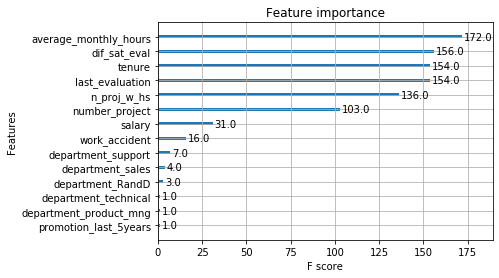

In [874]:
plot_importance(xgb_cv_fe.best_estimator_)

In [875]:
print(classification_report(y_test,y_pred_xgb_fe))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.96      0.91      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



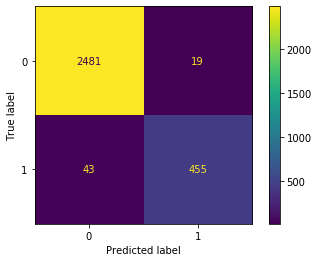

In [876]:
cm_xgb_fe = confusion_matrix(y_test, y_pred_xgb_fe)
cm_xgb_fe_display = ConfusionMatrixDisplay(confusion_matrix = cm_xgb_fe, 
                                        display_labels = xgb_cv.classes_)
cm_xgb_fe_display.plot(values_format='')

In [855]:
# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_xgb_fe)
roc_auc_train = auc(fpr_train, tpr_train)

print(f'AUC - Treinamento : {roc_auc_train:.3f}')
print(f'Gini - Treinamento: {(2*roc_auc_train-1):.3f}')
print("\n")

# Calculando a ROC e o Gini - 
# Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,  y_pred_xgb_fe)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'AUC - Teste : {(roc_auc_test):.3f}')
print(f'Gini - Teste: {(2*roc_auc_test-1):.3f}')

AUC - Treinamento : 0.958
Gini - Treinamento: 0.915


AUC - Teste : 0.955
Gini - Teste: 0.910


The best model was obtained from XGBoost model, where the model showed stability and good scores. The model is 

In [856]:
xgb_cv_results_fe = make_results('XGB CV FE', xgb_cv_fe, 'roc_auc')

In [857]:
# Generate results for all models
tree1_cv_results = make_results('decision_tree_cv', tree1, 'roc_auc')
rf_cv_results = make_results('Random Forest CV', rf_cv, 'roc_auc')
xgb_cv_results = make_results('XGB CV', xgb_cv, 'roc_auc')
xgb_cv_results_fe = make_results('XGB CV FE', xgb_cv_fe, 'roc_auc')
# Combine results into a single DataFrame
all_results = pd.concat([tree1_cv_results, rf_cv_results, xgb_cv_results, xgb_cv_results_fe], ignore_index=True)

# Display the combined table
print(all_results)


              model  accuracy  precision    recall        f1   roc_auc
0  decision_tree_cv  0.976426   0.948989  0.906897  0.927380  0.973927
1  Random Forest CV  0.979873   0.969979  0.906908  0.937331  0.981054
2            XGB CV  0.981875   0.978462  0.910915  0.943449  0.985843
3         XGB CV FE  0.980207   0.967968  0.910922  0.938572  0.981571
